## Name - Nikitha

## Task 6 - Iris Data Prediction using Decision Tree Algorithm

#### The task is to Create the Decision Tree classifier to predict the right class accordingly

#### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:

df = pd.read_csv('Iris.csv')
df.head(10) #It gives the output of 10 records

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Some Basic Analysis of Data set


In [8]:
print (df.shape)

(150, 6)


In [9]:
df.columns 

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [11]:
# Describe methos is used to view basic statistical details
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
df.duplicated() #to check duplicate values

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [13]:
df.isnull() #to check null values

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [14]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
df.info() #It gives the summary of database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>

In [17]:
df['Species'].value_counts() #It is a balanced dataset as the number of data points for every class is 50

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Visualization of the dataset

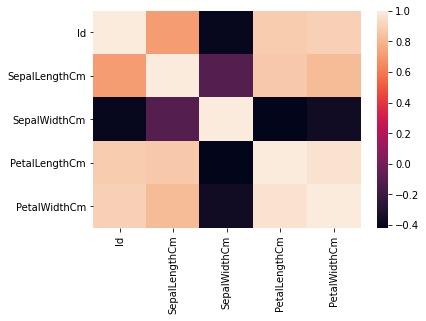

In [18]:
sns.heatmap(df.corr())

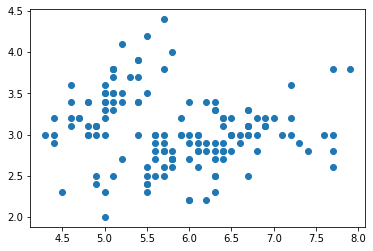

In [19]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()

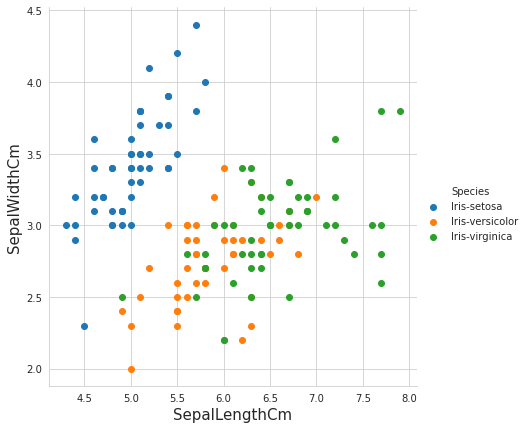

In [20]:
#Using Seaborn (sns) to visualize the data
sns.set_style("whitegrid")
sns.FacetGrid(df,hue = 'Species',size =6).map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend();
plt.xlabel('SepalLengthCm',fontsize=15)
plt.ylabel('SepalWidthCm',fontsize=15)
plt.show()

From the above plot we can say that using sepallength and sepalwidth features iris-setosa can be identified easily than iris-versicolor and iris-virginica

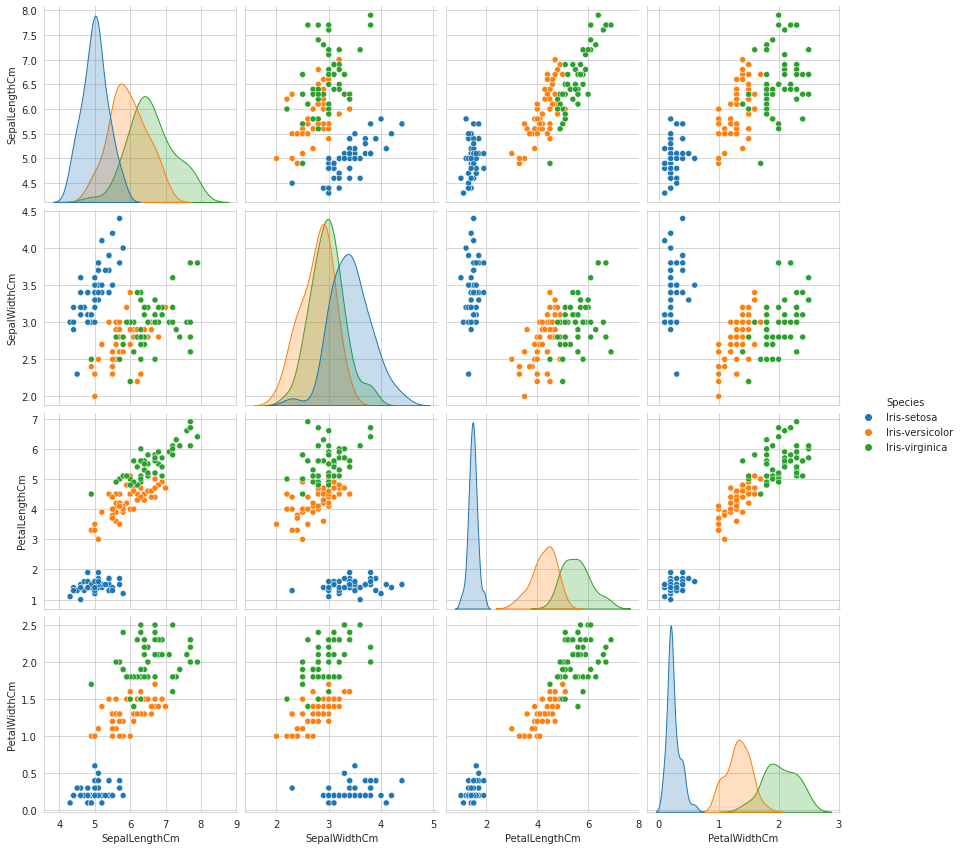

In [21]:
#Pairplot Can be used when number of features to visualize are high.
sns.set_style("whitegrid");
sns.pairplot(df.drop(['Id'],axis =1),hue="Species", size = 3)
plt.show()

 - From the above plot it depicts that petal_length and petal_width are the most useful features to identify various flower types as all the blue points are well separated. It's easy to identify setosa whereas Versicolor and virginica are partially overlapping with each other.

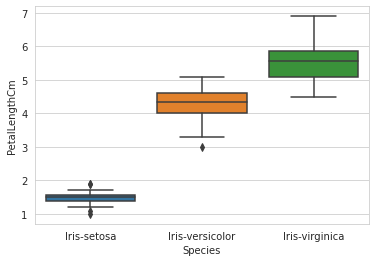

In [22]:
sns.boxplot(x='Species',y='PetalLengthCm', data=df)
plt.show()

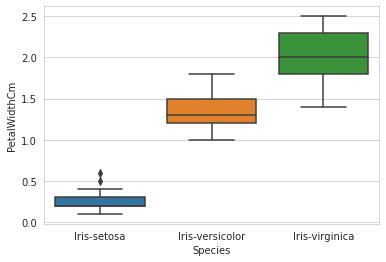

In [23]:
sns.boxplot(x='Species',y='PetalWidthCm', data=df)
plt.show()

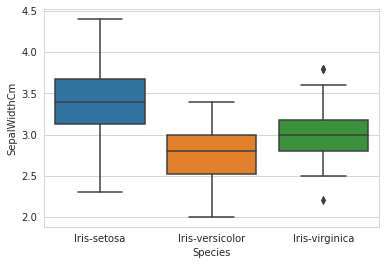

In [24]:
sns.boxplot(x='Species',y='SepalWidthCm', data=df)
plt.show()

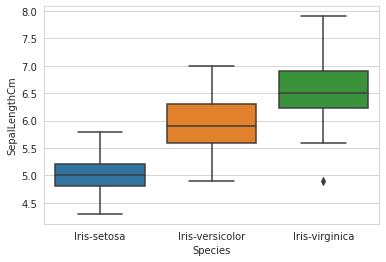

In [25]:
sns.boxplot(x='Species',y='SepalLengthCm', data=df)
plt.show()

 - Box plots used to visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

In [26]:
df.drop("Id", axis=1, inplace=True)

## Preparing and splitting the data into Training and Testing sets

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [28]:
x = df.drop(['Species'], axis=1) #independent variable

y = df['Species'] # dependent variable

In [29]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [30]:
X_train.shape, y_train.shape ,X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

## Building the decision tree classifier model


In [34]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree_classifier = DecisionTreeClassifier()
algo = dtree_classifier.fit(X_train,y_train)

In [35]:
pred = algo.predict(X_test)

In [42]:
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
data1.head(10)

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print("Accuracy of the model : ",accuracy_score(y_test,pred))
print("Classification report", classification_report(y_test,pred))

Accuracy of the model :  1.0
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [41]:
cm = confusion_matrix(y_test, pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

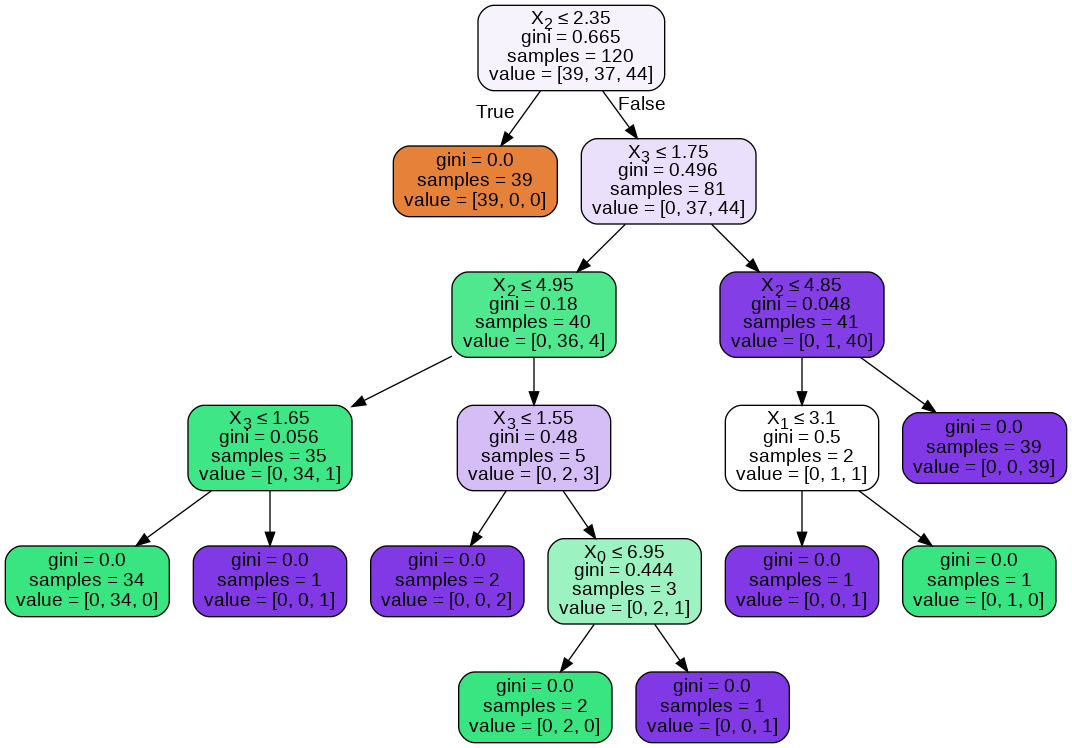

In [33]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz


dot_data = StringIO()
export_graphviz(dtree_classifier, out_file=dot_data,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
Thank you